In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px

from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [3]:
START_PRICE = 145

In [52]:
RANGE = np.arange(0, START_PRICE*2)

In [53]:
il = (np.sqrt(RANGE/START_PRICE)-1-(RANGE/START_PRICE-1)/2)

In [95]:
daily_funding = 0

In [96]:
power_perp = RANGE**2/(START_PRICE*4)

In [97]:
power_perp_price = START_PRICE**2*(1+daily_funding/10000)/(START_PRICE*4)

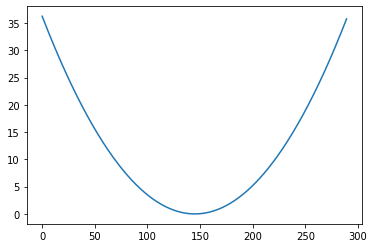

In [102]:
plt.plot(power_perp-power_perp_price+(0.5*(START_PRICE-RANGE)))

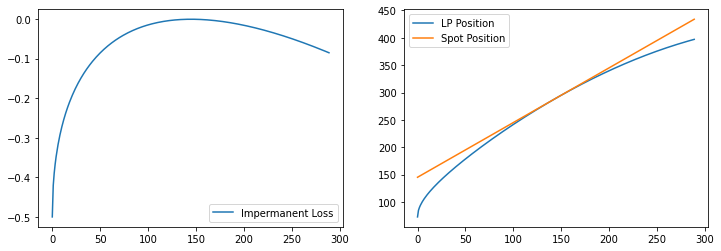

In [92]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), )

ax1.plot(il, label="Impermanent Loss")
ax1.legend()

ax2.plot(il*(START_PRICE+RANGE)+(START_PRICE+RANGE),label="LP Position")

ax2.plot(START_PRICE+RANGE, label="Spot Position")
ax2.legend()

In [94]:
power_perp-power_perp_price

array([-36.35875   , -36.35702586, -36.35185345, -36.34323276,
       -36.33116379, -36.31564655, -36.29668103, -36.27426724,
       -36.24840517, -36.21909483, -36.18633621, -36.15012931,
       -36.11047414, -36.06737069, -36.02081897, -35.97081897,
       -35.91737069, -35.86047414, -35.80012931, -35.73633621,
       -35.66909483, -35.59840517, -35.52426724, -35.44668103,
       -35.36564655, -35.28116379, -35.19323276, -35.10185345,
       -35.00702586, -34.90875   , -34.80702586, -34.70185345,
       -34.59323276, -34.48116379, -34.36564655, -34.24668103,
       -34.12426724, -33.99840517, -33.86909483, -33.73633621,
       -33.60012931, -33.46047414, -33.31737069, -33.17081897,
       -33.02081897, -32.86737069, -32.71047414, -32.55012931,
       -32.38633621, -32.21909483, -32.04840517, -31.87426724,
       -31.69668103, -31.51564655, -31.33116379, -31.14323276,
       -30.95185345, -30.75702586, -30.55875   , -30.35702586,
       -30.15185345, -29.94323276, -29.73116379, -29.51

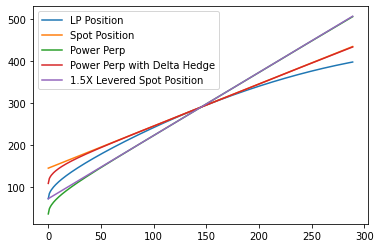

In [118]:
plt.plot(il*(START_PRICE+RANGE)+(START_PRICE+RANGE),label="LP Position")

plt.plot(START_PRICE+RANGE, label="Spot Position")

plt.plot(il*(START_PRICE+RANGE)+(START_PRICE+RANGE)+(power_perp-power_perp_price), label="Power Perp")

# plt.plot(START_PRICE+1.5*RANGE, label="1.5 Spot Position")


plt.plot(il*(START_PRICE+RANGE)+(START_PRICE+RANGE)+(power_perp-power_perp_price)+(0.5*(START_PRICE-RANGE)), label="Power Perp with Delta Hedge")

plt.plot(START_PRICE+RANGE+0.5*(RANGE-START_PRICE), label="1.5X Levered Spot Position")

# plt.plot(il*(START_PRICE+RANGE)+(START_PRICE+RANGE)+(power_perp-power_perp_price)+(1.5*(START_PRICE-RANGE)), label="Power Perp with Delta Hedge")




plt.legend()

In [ ]:

app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Impermanent Loss Calculator"),
    dcc.Graph(id='graph'),
    html.Label([
        "symbol",
        dcc.Dropdown(
            id='symbol', clearable=False,
            value='BTC', options=[
                {'label': symbol, 'value': symbol}
                for symbol in ['BTC', 'ETH']
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("symbol", "value"), Input("optionType", "value")]
)
def update_figure(symbol, optionType):
    headers = {
      'x-oracle': 'Sx20OuqatRfgQmS6Qntn',
      'Content-Type': 'application/json',
      'accept': '*/*',
      'Accept-Language': 'en-US,en;q=0.9'
    }
    url = "https://app.pinkswantrading.com/graphql"

    put_payload="{\"query\":\"query cashSecuredPuts($symbol: SymbolEnumType) {\\n\\t\\tderibit: genericCashSecuredPuts(symbol: $symbol, exchange: deribit) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tbitcom: genericCashSecuredPuts(symbol: $symbol, exchange: bitcom) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tledgerx: genericCashSecuredPuts(symbol: $symbol, exchange: ledgerx) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tokex: genericCashSecuredPuts(symbol: $symbol, exchange: okex) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tbinance: genericCashSecuredPuts(symbol: $symbol, exchange: binance) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t}\",\"variables\":{\"symbol\":\"%s\"}}"
    call_payload="{\"query\":\"query coveredCall($symbol: SymbolEnumType) {\\n\\t\\tderibit: genericCoveredCall(exchange: deribit, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tbitcom: genericCoveredCall(exchange: bitcom, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tledgerx: genericCoveredCall(exchange: ledgerx, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tokex: genericCoveredCall(exchange: okex, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tbinance: genericCoveredCall(exchange: binance, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t}\",\"variables\":{\"symbol\":\"%s\"}}"

    if optionType == "CC":
        payload = call_payload % symbol
        yield_column = "annualMarkYieldNet"
    else:
        payload = put_payload % symbol
        yield_column = "markYieldNetAnnual"

    response_data = requests.request("GET", url, headers=headers, data=payload)
    json_data = response_data.json()
    dbt = json_data.get('data')['deribit']

    test = pd.DataFrame(dbt)
    today = pd.Timestamp.today().floor('D')
    test['expiration'] = (pd.to_datetime(test['expiration'],unit='ms').round('min')).round('D')
    test = test.sort_values('strike',ascending=True)

    summary_data = test[['expiration','strike',yield_column]].set_index('expiration')
    summary_data = summary_data.pivot(columns='strike',values=yield_column)

    fig = px.line(summary_data)
    return fig.update_layout(
        title="{symbol} {optionType} APY by Strike and Expiry".format(symbol=symbol, optionType=optionType),
        xaxis_title="Expiry",
        yaxis_title="Annualized APY")
# Run app and display result inline in the notebook
# app.run_server(mode='inline')
app.run_server(mode='external')

In [ ]:
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("APY by Strike"),
    dcc.Graph(id='graph'),
    html.Label([
        "symbol",
        dcc.Dropdown(
            id='symbol', clearable=False,
            value='BTC', options=[
                {'label': symbol, 'value': symbol}
                for symbol in ['BTC', 'ETH']
            ])
    ]),
    html.Label([
        "optionType",
        dcc.Dropdown(
            id='optionType', clearable=False,
            value='CC', options=[
                {'label': optionType, 'value': optionType}
                for optionType in ['CC', 'CSP']
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("symbol", "value"), Input("optionType", "value")]
)
def update_figure(symbol, optionType):
    headers = {
      'x-oracle': 'Sx20OuqatRfgQmS6Qntn',
      'Content-Type': 'application/json',
      'accept': '*/*',
      'Accept-Language': 'en-US,en;q=0.9'
    }
    url = "https://app.pinkswantrading.com/graphql"

    put_payload="{\"query\":\"query cashSecuredPuts($symbol: SymbolEnumType) {\\n\\t\\tderibit: genericCashSecuredPuts(symbol: $symbol, exchange: deribit) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tbitcom: genericCashSecuredPuts(symbol: $symbol, exchange: bitcom) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tledgerx: genericCashSecuredPuts(symbol: $symbol, exchange: ledgerx) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tokex: genericCashSecuredPuts(symbol: $symbol, exchange: okex) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t\\tbinance: genericCashSecuredPuts(symbol: $symbol, exchange: binance) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tbidYieldNetAnnual\\n\\t\\t\\tmarkYieldNetAnnual\\n\\t\\t\\taskYieldNetAnnual\\n\\t\\t}\\n\\t}\",\"variables\":{\"symbol\":\"%s\"}}"
    call_payload="{\"query\":\"query coveredCall($symbol: SymbolEnumType) {\\n\\t\\tderibit: genericCoveredCall(exchange: deribit, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tbitcom: genericCoveredCall(exchange: bitcom, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tledgerx: genericCoveredCall(exchange: ledgerx, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tokex: genericCoveredCall(exchange: okex, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t\\tbinance: genericCoveredCall(exchange: binance, symbol: $symbol) {\\n\\t\\t\\tdate\\n\\t\\t\\tinstrumentName\\n\\t\\t\\texpiration\\n\\t\\t\\tstrike\\n\\t\\t\\tputCall\\n\\t\\t\\tbidUsd\\n\\t\\t\\tmarkUsd\\n\\t\\t\\taskUsd\\n\\t\\t\\tcalledOutAnnualized\\n\\t\\t\\tcalledOutAbsolute\\n\\t\\t\\tabsoluteBidYieldNet\\n\\t\\t\\tabsoluteMarkYieldNet\\n\\t\\t\\tabsoluteAskYieldNet\\n\\t\\t\\tannualBidYieldNet\\n\\t\\t\\tannualAskYieldNet\\n\\t\\t\\tannualMarkYieldNet\\n\\t\\t\\tabsoluteMarkYieldCalledOut\\n\\t\\t\\tabsoluteAskYieldCalledOut\\n\\t\\t\\tabsoluteBidYieldCalledOut\\n\\t\\t\\tannualizedBidYieldCalledOut\\n\\t\\t\\tannualizedMarkYieldCalledOut\\n\\t\\t\\tannualizedAskYieldCalledOut\\n\\t\\t}\\n\\t}\",\"variables\":{\"symbol\":\"%s\"}}"

    if optionType == "CC":
        payload = call_payload % symbol
        yield_column = "annualMarkYieldNet"
    else:
        payload = put_payload % symbol
        yield_column = "markYieldNetAnnual"

    response_data = requests.request("GET", url, headers=headers, data=payload)
    json_data = response_data.json()
    dbt = json_data.get('data')['deribit']

    test = pd.DataFrame(dbt)
    today = pd.Timestamp.today().floor('D')
    test['expiration'] = (pd.to_datetime(test['expiration'],unit='ms').round('min')).round('D')
    test = test.sort_values('strike',ascending=True)

    summary_data = test[['expiration','strike',yield_column]].set_index('expiration')
    summary_data = summary_data.pivot(columns='strike',values=yield_column)

    fig = px.line(summary_data)
    return fig.update_layout(
        title="{symbol} {optionType} APY by Strike and Expiry".format(symbol=symbol, optionType=optionType),
        xaxis_title="Expiry",
        yaxis_title="Annualized APY")
# Run app and display result inline in the notebook
# app.run_server(mode='inline')
app.run_server(mode='external')